In [1]:
from ShortStratergy import get_monthly_returns, run_backtest
import pandas as pd

leveraged = 'Files/SOXL.csv'
inverse = 'Files/SOXS.csv'

# leveraged = 'Files/JNUG.csv'
# inverse = 'Files/JDST.csv'
backtest =run_backtest(leveraged, inverse)

In [2]:
backtest['trades']['inverse']

[{'date': datetime.date(2010, 3, 11),
  'price': 162290592.0,
  'size': 9.242679945366149e-06,
  'value': 1500.0,
  'position_value_before': 0.0,
  'position_value_after': 1500.0,
  'product_type': 'inverse',
  'trade_type': 'initial',
  'quarter_profit_loss': 0,
  'quarter_profit_loss_per': 0,
  'direction': 'INIT'},
 {'date': datetime.date(2010, 3, 23),
  'price': 143756864.0,
  'size': 1.1916044307871868e-06,
  'value': 171.30131609847103,
  'position_value_before': 1328.698683901529,
  'position_value_after': 1500.0,
  'product_type': 'inverse',
  'trade_type': 'additional',
  'quarter_profit_loss': 171.30131609847103,
  'quarter_profit_loss_per': 0,
  'direction': 'SELL'},
 {'date': datetime.date(2010, 4, 13),
  'price': 129373144.0,
  'size': 1.1600848539861123e-06,
  'value': 150.08382486696428,
  'position_value_before': 1349.9161751330357,
  'position_value_after': 1500.0,
  'product_type': 'inverse',
  'trade_type': 'additional',
  'quarter_profit_loss': 321.3851409654353,
  

In [3]:
lev_trades = pd.DataFrame(backtest['trades']['leveraged'])
inv_trades = pd.DataFrame(backtest['trades']['inverse'])

# View the trades

In [4]:
inv_trades

,date,price,size,value,position_value_before,position_value_after,product_type,trade_type,quarter_profit_loss,quarter_profit_loss_per,direction
0,2010-03-11,1.622906e+08,0.000009,1500.000000,0.000000,1500.0,inverse,initial,0.000000,0.000000,INIT
1,2010-03-23,1.437569e+08,0.000001,171.301316,1328.698684,1500.0,inverse,additional,171.301316,0.000000,SELL
2,2010-04-13,1.293731e+08,0.000001,150.083825,1349.916175,1500.0,inverse,additional,321.385141,0.000000,SELL
3,2010-04-14,1.126122e+08,0.000002,194.332017,1305.667983,1500.0,inverse,additional,515.717158,0.000000,SELL
4,2010-06-30,1.543533e+08,0.000004,555.992773,2055.992773,1500.0,inverse,rebalance-BUY,-40.275615,-0.026850,BUY
...,...,...,...,...,...,...,...,...,...,...,...
216,2024-09-30,1.998537e+01,4.111820,82.176257,1582.176257,1500.0,inverse,rebalance-BUY,134.754914,0.089837,BUY
217,2024-10-14,1.768582e+01,9.758816,172.592682,1327.407318,1500.0,inverse,additional,172.592682,0.000000,SELL
218,2024-12-31,2.247000e+01,18.058026,405.763829,1905.763829,1500.0,inverse,rebalance-BUY,-233.171147,-0.155447,BUY
219,2024-12-31,1.833000e+01,80.515302,24.154529,1475.845471,0.0,inverse,rebalance-SELL,280.496336,0.186998,SELL-R


# Filter for different types of trades

In [5]:
lev_trades_rebalnce = lev_trades.query('trade_type != "initial" and trade_type !="additional"')

In [6]:
inv_trades_re =inv_trades.query('trade_type != "initial" and trade_type !="additional"')

In [7]:
inv_trades_re

,date,price,size,value,position_value_before,position_value_after,product_type,trade_type,quarter_profit_loss,quarter_profit_loss_per,direction
4,2010-06-30,1.543533e+08,3.602079e-06,555.992773,2055.992773,1500.0,inverse,rebalance-BUY,-40.275615,-0.026850,BUY
7,2010-09-30,1.151908e+08,7.247024e-08,8.347907,1491.652093,1500.0,inverse,rebalance-SELL,409.241053,0.272827,SELL-R
13,2010-12-31,6.586786e+07,7.454599e-07,49.101848,1549.101848,1500.0,inverse,rebalance-BUY,786.548052,0.524365,BUY
17,2011-03-31,4.954616e+07,4.148784e-06,205.556306,1705.556306,1500.0,inverse,rebalance-BUY,373.196529,0.248798,BUY
19,2011-06-30,5.481628e+07,6.481661e-06,355.300563,1855.300563,1500.0,inverse,rebalance-BUY,-197.038921,-0.131359,BUY
20,2011-09-30,7.485646e+07,7.325784e-06,548.382269,2048.382269,1500.0,inverse,rebalance-BUY,-548.382269,-0.365588,BUY
25,2011-12-30,4.855692e+07,3.362884e-06,163.291293,1663.291293,1500.0,inverse,rebalance-BUY,588.983156,0.392655,BUY
30,2012-03-30,2.554057e+07,3.031358e-06,77.422589,1422.577411,1500.0,inverse,rebalance-SELL,897.934565,0.598623,SELL-R
31,2012-06-29,3.308762e+07,1.339592e-05,443.239003,1943.239003,1500.0,inverse,rebalance-BUY,-443.239003,-0.295493,BUY
34,2012-09-28,3.069985e+07,7.372769e-06,226.342893,1726.342893,1500.0,inverse,rebalance-BUY,80.021876,0.053348,BUY


In [8]:
lev_trades_rebalnce

,date,price,size,value,position_value_before,position_value_after,product_type,trade_type,quarter_profit_loss,quarter_profit_loss_per,direction
3,2010-06-30,0.431899,126.825232,54.775666,945.224334,1000.0,leveraged,rebalance-SELL,316.340330,0.316340,SELL-R
6,2010-09-30,0.475836,930.576564,442.801561,1442.801561,1000.0,leveraged,rebalance-BUY,-191.009939,-0.191010,BUY
7,2010-12-31,0.763139,791.188428,603.786753,1603.786753,1000.0,leveraged,rebalance-BUY,-603.786753,-0.603787,BUY
8,2011-03-31,0.876869,169.955771,149.028910,1149.028910,1000.0,leveraged,rebalance-BUY,-149.028910,-0.149029,BUY
12,2011-06-30,0.699175,173.703225,121.448891,1121.448891,1000.0,leveraged,rebalance-BUY,200.910471,0.200910,BUY
17,2011-09-30,0.351267,23.316806,8.190417,991.809583,1000.0,leveraged,rebalance-SELL,629.932552,0.629933,SELL-R
19,2011-12-30,0.396301,679.886632,269.439834,1269.439834,1000.0,leveraged,rebalance-BUY,-158.182888,-0.158183,BUY
20,2012-03-30,0.672002,1035.242866,695.685233,1695.685233,1000.0,leveraged,rebalance-BUY,-695.685233,-0.695685,BUY
26,2012-06-29,0.430496,584.591704,251.664568,1251.664568,1000.0,leveraged,rebalance-BUY,374.250917,0.374251,BUY
28,2012-09-28,0.411566,326.073244,134.200754,1134.200754,1000.0,leveraged,rebalance-BUY,22.890747,0.022891,BUY


# Calculate the average monthly return

In [9]:
import pandas as pd
from datetime import datetime

def calculate_avg_monthly_returns(df):
    """
    Calculate average monthly returns based on quarterly return percentages.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing 'date' and 'quarter_profit_loss_per' columns
    
    Returns:
    pd.DataFrame: Monthly returns with columns ['month', 'return']
    """
    # Convert date column to datetime if it's not already
    df['date'] = pd.to_datetime(df['date'])
    
    # Get only the rows where quarterly returns are calculated (non-zero)
    quarterly_returns = df[df['quarter_profit_loss_per'] != 0].copy()
    
    # Initialize dict to store results
    monthly_returns = {}
    
    # Process each quarterly return
    for i in range(len(quarterly_returns)):
        current_row = quarterly_returns.iloc[i]
        current_date = current_row['date']
        current_return = current_row['quarter_profit_loss_per']
        
        # If this is the first entry, we need to handle it specially
        if i == 0:
            # Get the number of months from the first trade to this quarterly return
            first_trade_date = df['date'].min()
            months_in_first_period = (
                (current_date.year - first_trade_date.year) * 12 + 
                current_date.month - first_trade_date.month + 1
            )
            monthly_return = current_return / months_in_first_period
            
            # Distribute this return across the months in the first period
            current_month = first_trade_date
            while current_month <= current_date:
                month_key = current_month.strftime('%Y-%m')
                if month_key not in monthly_returns:
                    monthly_returns[month_key] = []
                monthly_returns[month_key].append(monthly_return)
                current_month = (current_month + pd.DateOffset(months=1))
        else:
            # For subsequent quarters, we'll distribute the return across 3 months
            previous_date = quarterly_returns.iloc[i-1]['date']
            months_in_period = (
                (current_date.year - previous_date.year) * 12 + 
                current_date.month - previous_date.month + 1
            )
            monthly_return = current_return / months_in_period
            
            # Distribute this return across the months in this period
            current_month = previous_date + pd.DateOffset(months=1)
            while current_month <= current_date:
                month_key = current_month.strftime('%Y-%m')
                if month_key not in monthly_returns:
                    monthly_returns[month_key] = []
                monthly_returns[month_key].append(monthly_return)
                current_month = (current_month + pd.DateOffset(months=1))
    
    # Calculate average monthly returns
    result_data = []
    for month, returns in monthly_returns.items():
        result_data.append({
            'month': month,
            'return': sum(returns) / len(returns)
        })
    
    # Convert to DataFrame and sort by month
    result_df = pd.DataFrame(result_data)
    result_df = result_df.sort_values('month').reset_index(drop=True)
    
    return result_df

In [10]:
leveraged_monthly_returns = calculate_avg_monthly_returns(lev_trades)
inverse_monthly_returns = calculate_avg_monthly_returns(inv_trades)


In [11]:
leveraged_monthly_returns

,month,return
0,2010-03,0.079085
1,2010-04,0.079085
2,2010-05,0.079085
3,2010-06,0.079085
4,2010-07,-0.047752
...,...,...
166,2024-08,0.072858
167,2024-09,0.072858
168,2024-10,0.066594
169,2024-11,0.066594


In [12]:
inverse_monthly_returns

,month,return
0,2010-03,-0.006713
1,2010-04,-0.006713
2,2010-05,-0.006713
3,2010-06,-0.006713
4,2010-07,0.068207
...,...,...
166,2024-08,0.022459
167,2024-09,0.022459
168,2024-10,-0.038862
169,2024-11,-0.038862


# Calculate the avg quarterly return for both the leveraged and inverse

In [13]:
def calculate_combined_returns(leveraged_trades, inverse_trades):
    """
    Combines two dataframes and calculates return percentage based on combined quarter_profit_loss.
    
    Parameters:
    leveraged_trades, inverse_trades (pd.DataFrame): Input dataframes with identical structure
    
    Returns:
    pd.DataFrame: DataFrame with date and return_per columns
    """
    # Concatenate the dataframes
    combined_df = pd.concat([leveraged_trades, inverse_trades], ignore_index=True)
    
    # Group by date and sum the quarter_profit_loss
    daily_profits = combined_df.groupby('date')['quarter_profit_loss'].sum()
    
    # Calculate return percentage
    # Creating a new dataframe with date and return_per
    result_df = pd.DataFrame({
        'date': daily_profits.index,
        'return_per_quarter': daily_profits / 1800
    }).reset_index(drop=True)
    
    # Sort by date
    result_df = result_df.sort_values('date')
    
    return result_df

In [ ]:
combined_quarterly_returns = calculate_combined_returns(lev_trades_rebalnce, inv_trades_re)

In [15]:
combined_quarterly_returns

,date,return_per_quarter
0,2010-06-30,0.153369
1,2010-09-30,0.121240
2,2010-12-31,0.101534
3,2011-03-31,0.124538
4,2011-06-30,0.002151
5,2011-09-30,0.045306
6,2011-12-30,0.239333
7,2012-03-30,0.112361
8,2012-06-29,-0.038327
9,2012-09-28,0.057174


# Calculation of metrics

In [16]:
# Calculate key financial metrics

# 1. Cumulative Returns (starting with 1 to represent portfolio value)
portfolio_values = (1 + combined_quarterly_returns['return_per_quarter']).cumprod()
cumulative_returns = portfolio_values - 1

# 2. Total Return
total_return = cumulative_returns.iloc[-1]

# 3. Average Quarterly Return
avg_quarterly_return = combined_quarterly_returns['return_per_quarter'].mean()

# 4. Volatility (Standard Deviation)
volatility = combined_quarterly_returns['return_per_quarter'].std()

# 5. Maximum Drawdown (corrected calculation)
rolling_peak = portfolio_values.expanding().max()
drawdowns = (portfolio_values - rolling_peak) / rolling_peak  # Percentage decline from peak
max_drawdown = drawdowns.min()

# 6. Win Rate (percentage of positive quarters)
win_rate = (combined_quarterly_returns['return_per_quarter'] > 0).mean()

# 7. Best and Worst Quarters
best_quarter = combined_quarterly_returns['return_per_quarter'].max()
worst_quarter = combined_quarterly_returns['return_per_quarter'].min()

# Create a summary of metrics
metrics_summary = pd.Series({
    'Total Return': f'{total_return:.2%}',
    'Average Quarterly Return': f'{avg_quarterly_return:.2%}',
    'Quarterly Volatility': f'{volatility:.2%}',
    'Maximum Drawdown': f'{max_drawdown:.2%}',
    'Win Rate': f'{win_rate:.2%}',
    'Best Quarter': f'{best_quarter:.2%}',
    'Worst Quarter': f'{worst_quarter:.2%}'
})

print("Financial Metrics Summary:")
print(metrics_summary)


Financial Metrics Summary:
Total Return                18494.40%
Average Quarterly Return        9.69%
Quarterly Volatility           10.32%
Maximum Drawdown              -15.09%
Win Rate                       88.14%
Best Quarter                   59.93%
Worst Quarter                  -8.11%
dtype: object


# Visulisation of results

Data types:
Date dtype: object
Portfolio values dtype: float64
Drawdowns dtype: float64

First few rows of data:
Dates: 0    2010-06-30
1    2010-09-30
2    2010-12-31
3    2011-03-31
4    2011-06-30
Name: date, dtype: object
Portfolio values: 0    1.153369
1    1.293203
2    1.424507
3    1.601912
4    1.605358
Name: return_per_quarter, dtype: float64
Drawdowns: 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: return_per_quarter, dtype: float64


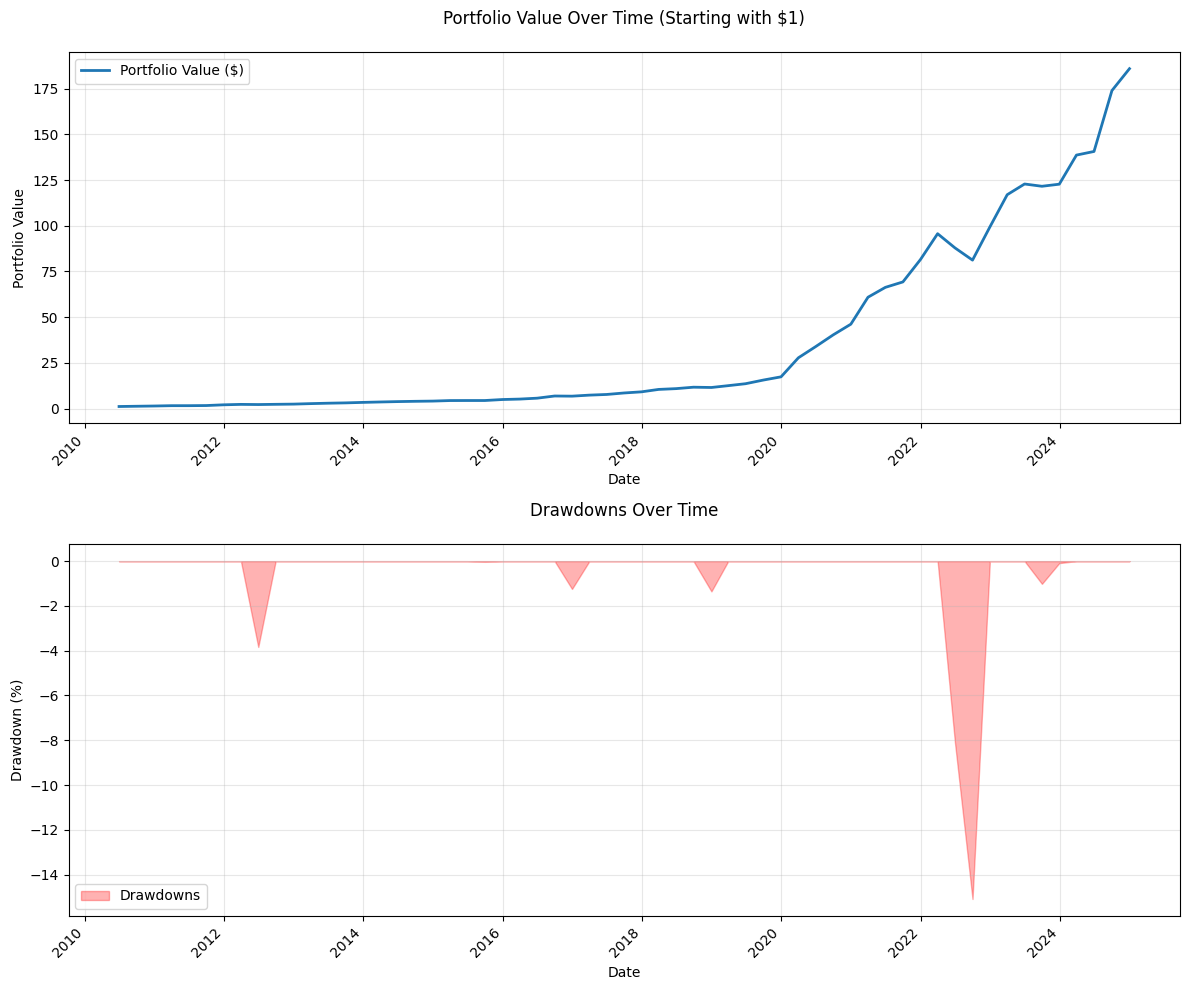


Plot should be displayed above. If not, there might be an issue with the display backend.


In [17]:
# First let's check our data
print("Data types:")
print("Date dtype:", combined_quarterly_returns['date'].dtype)
print("Portfolio values dtype:", portfolio_values.dtype)
print("Drawdowns dtype:", drawdowns.dtype)

print("\nFirst few rows of data:")
print("Dates:", combined_quarterly_returns['date'].head())
print("Portfolio values:", portfolio_values.head())
print("Drawdowns:", drawdowns.head())

# Convert date to datetime if it isn't already
combined_quarterly_returns['date'] = pd.to_datetime(combined_quarterly_returns['date'])

# Create the visualization
import matplotlib.pyplot as plt

# Create figure and axes with a clean style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.facecolor'] = 'white'

fig, (ax1, ax2) = plt.subplots(2, 1)

# Plot portfolio value with explicit datetime conversion
ax1.plot(combined_quarterly_returns['date'], portfolio_values.values, 
         label='Portfolio Value ($)', color='#1f77b4', linewidth=2)
ax1.set_title('Portfolio Value Over Time (Starting with $1)', pad=20)
ax1.set_xlabel('Date')
ax1.set_ylabel('Portfolio Value')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot drawdowns with explicit datetime conversion
ax2.fill_between(combined_quarterly_returns['date'], drawdowns.values * 100, 0, 
                 color='red', alpha=0.3, label='Drawdowns')
ax2.set_title('Drawdowns Over Time', pad=20)
ax2.set_xlabel('Date')
ax2.set_ylabel('Drawdown (%)')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Rotate x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Force display
plt.show()
print("\nPlot should be displayed above. If not, there might be an issue with the display backend.")
